# Modèle de battement du coer 

## Modèle du battement du coer et oscillations avec relaxation
   Déjà à la fin du dix-neuvième siècle, on savait que l'activité cardiaque est associée à la production d'une quantité de courant électrique. On a commencé à quantifier ce courant au début du vingtième siècle (électrocardiogramme). La cellule cardiaque est une cellule polarisée qui a, le long de sa paroi, une série de dipôles, chargés positivement sur la surface externe et négativement sur la interne, quand le coeur est au repos (diastole). Quand la cellule est excitée, il y a une chute de la constante diélectrique de la membrane et on a donc des charges négatives qui passent à l'éxtérieur. Ce phénomène se poursuit jusqu'à la dépolarisation de la cellule, qui attein alors l'état d'excitation (systole). Après un court délai, des processus physiques et chimiques réparent la cellule et la repolarisent. La procédé de repolarisation est plus lent que celui de dépolarisation. 
   
   Le battement du coeur fait partie des système naturels auto-exités (à partir de n'importe quelle condition initiale, le système approche rapidement un cycle limide stable) pour lesquels on peut remarquer des oscilliations avec relaxition: En citant Van der Pol et Van der Mark, plusieurs phénomènes présentent ce type d'oscillations: harpe éolienne, marteau pneumatique, grincement d'un couteau sur une assiette, mouvement d'un drapeau dans le vent,...tube à néon,... et, finalement, le battement du coeur. Ces phénomènes se caractérisent par les propriétés suivantes:
   
   - Leur période est constante (temps de relaxation).
   - La forme de l'onde est sensiblement différente d'une onde sinusoidale.
   - L'amplitude de l'onde est indépendante de la force extérieure appliquée pourvu que cette force soit assez petite. 
   - La période, en revanche, dépend de la force extérieure appliquée. Si celle-ci est périodique, le système de relaxation tend à se synchroniser pour devenir périodique avec la même période que celle de la force extérieure.
   
   Pour donne un exemple de système auto-exités, on considère un circuit électrique RLC, décrit par la loi de Kirchoff, la loi Faraday et la loi d'Ohm généralisée. En notant par $x$ l'intensité du courant dans l'inductance L et $y$ la tension aux bornes du condensateur C et en normalisent les constantes physiques, on obtient le système d'équation différentielles:
   $$\begin{cases}
   x'(t)=\epsilon (y(t)-f(x(t)))\\
   y'(t)=-x(t)
   \end{cases}$$
   Si dans la loi d'Ohm généralisée, on choisit $f(x)=\frac{x^3}{3}-x$, le système ci-dessus est appelé système de Van der Pol. Il peut se récrire:
   $$x''(t)/\varepsilon +(x(t)^2-1)x'(t)+x(t)=0.$$
  On va essayer de montrer qu'en choisissant opportunément les paramètres, l'équation ci-dessus peut décrire un système naturel auto-excités avec des oscillations avec relaxation.
  
  Dans premier temps, on prend $varepsilon=1$, on obtient l'équation:
  $$\begin{cases}
  x'(t)&=y(t)-1/3 x(t)^3+x(t)\\
  y'(t)&=-x(t).
  \end{cases}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

On utilise le chéma de Runge-Kutta

In [2]:
def RUNK4(F, T, N, y_0):
    h=T/N
    t=np.linspace(0,T, N+1)
    d=np.array(y_0).size
    Res=np.zeros((d, N+1))
    Res[:,0]=y_0
    for i in range(N):
        k_1=F(Res[:,i])
        k_2=F(Res[:,i]+(h/2)*k_1)
        k_3=F(Res[:,i]+(h/2)*k_2)
        k_4=F(Res[:,i]+h*k_3)
        Res[:,i+1]=Res[:,i]+(h/6)*(k_1+2*k_2+2*k_3+k_4)
    return Res
    

Méthode Euler explicite

In [3]:
def EulerE(F, T, N, y_0):
    h=T/N
    t=np.linspace(0,T, N+1)
    d=np.array(y_0).size
    Res=np.zeros((d, N+1))
    Res[:,0]=y_0
    for i in range(N):
        Res[:,i+1]=Res[:,i]+h*F(Res[:,i])
    return Res

In [4]:
def fonc(x):
    return np.array([eps*(x[1]-(x[0]**3)/3+x[0]), -x[0]])

In [17]:
#Valeurs initiales
init1=np.array([0,0.5])
init2=np.array([1,2])
init3=np.array([4,3])

findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


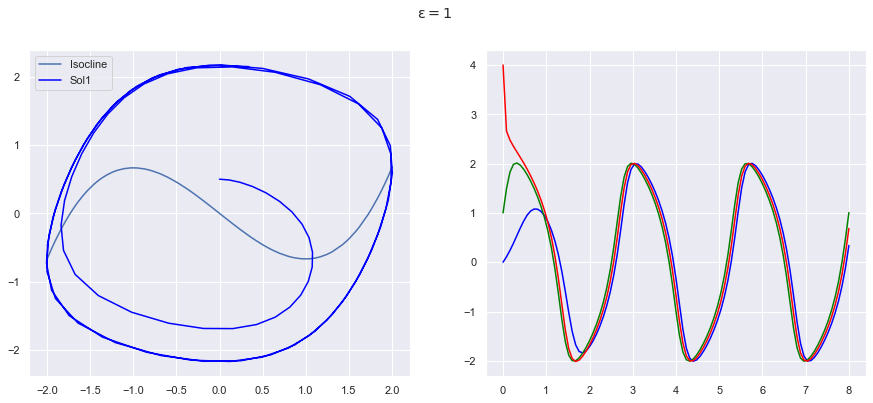

In [6]:
eps=1
Res1=RUNK4(fonc, 20, 100, init1)
Res2=RUNK4(fonc, 20, 100, init2)
Res3=RUNK4(fonc, 20, 100, init3)
sns.set()
plt.figure(figsize=(15,6))
plt.suptitle('$\epsilon=1$')
plt.subplot(1,2,1)
sns.lineplot(Res1[0], Res1[0]**3/3-Res1[0], label='Isocline')
#sns.lineplot(base2, base2**3/3-base2, label='isocline')
#plt.quiver(x,y,u,v)
u,v=fonc([Res1[0], Res1[1]])

plt.plot(Res1[0], Res1[1],  label='Sol1', color='blue')
plt.legend()
#sns.lineplot(x=Res1[0], y=Res1[1],  label='Sol1', color='blue')
#u,v=fonc([Res2[0], Res2[1]])
#sns.lineplot(Res2[0], Res2[1], label='Sol2', color='green')
#u,v=fonc([Res3[0], Res3[1]])
#sns.lineplot(Res3[0], Res3[1], label='Sol3', color='red')
plt.subplot(1,2,2)
T=np.linspace(0,8, 101)
sns.lineplot(T, Res1[0], color='blue')
sns.lineplot(T, Res2[0], color='green')
sns.lineplot(T, Res3[0], color='red')


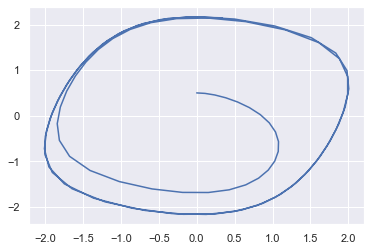

In [7]:
x=np.array(Res1[0])
y=np.array(Res1[1])
plt.plot(x,y)

In [8]:
def fonc2(x,y):
    return np.array([y-x**3/3+x, -x])

In [9]:
base=np.linspace(-3,3,20)
x,y=np.meshgrid(base, base)
base2=np.linspace(-2.5,2.5,20)
u,v=fonc2(x,y)

In [10]:
base=np.linspace(-3,3,20)
x,y=np.meshgrid(base, base)
base2=np.linspace(-2.5,2.5,20)
u,v=fonc2(x,y)

In [11]:
u,v=fonc2(x,y)

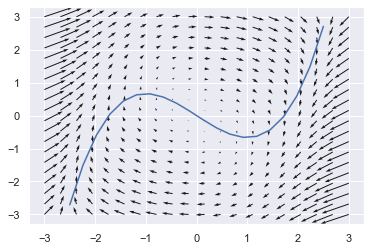

In [12]:
plt.plot(base2, base2**3/3-base2)
plt.quiver(x,y,u,v)

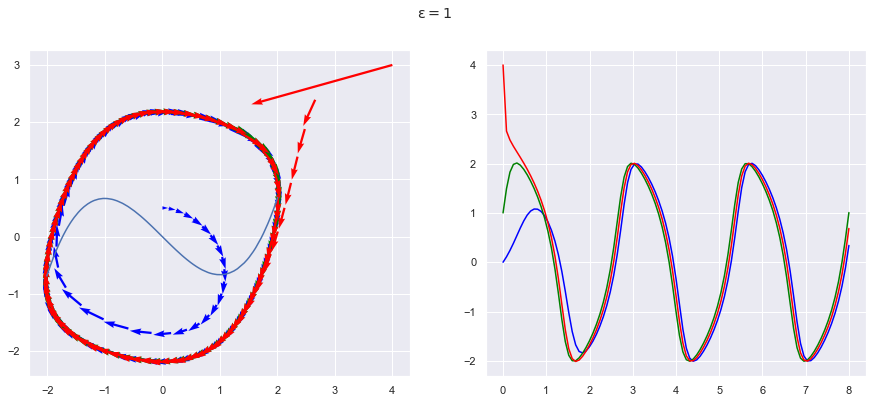

In [13]:
sns.set()
plt.figure(figsize=(15,6))
plt.suptitle('$\epsilon=1$')
plt.subplot(1,2,1)
sns.lineplot(Res1[0], Res1[0]**3/3-Res1[0])
u,v=fonc([Res1[0], Res1[1]])
plt.quiver(Res1[0], Res1[1], u,v,color='blue')
u,v=fonc([Res2[0], Res2[1]])
plt.quiver(Res2[0], Res2[1], u,v,color='green')
u,v=fonc([Res3[0], Res3[1]])
plt.quiver(Res3[0], Res3[1], u,v, color='red')
plt.subplot(1,2,2)
T=np.linspace(0,8, 101)
sns.lineplot(T, Res1[0], color='blue')
sns.lineplot(T, Res2[0], color='green')
sns.lineplot(T, Res3[0], color='red')


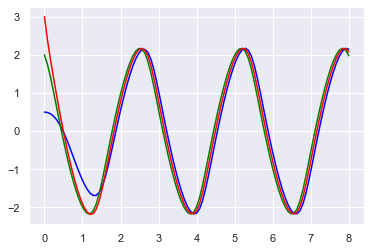

In [14]:
sns.lineplot(T, Res1[1], color='blue')
sns.lineplot(T, Res2[1], color='green')
sns.lineplot(T, Res3[1], color='red')

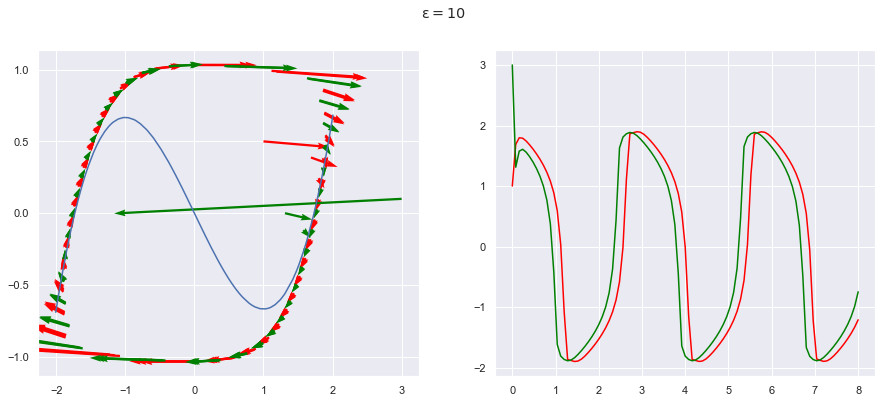

In [15]:
eps=10
Res4=RUNK4(fonc, 8, 100, np.array([1,0.5]))
Res5=RUNK4(fonc, 8, 100, np.array([3, 0.1]))
plt.figure(figsize=(15,6))
plt.suptitle('$\epsilon=10$')
plt.subplot(1,2,1)
sns.lineplot(Res1[0], Res1[0]**3/3-Res1[0])
u,v=fonc([Res4[0], Res4[1]])
plt.quiver(Res4[0], Res4[1], u,v,color='red')
u,v=fonc([Res5[0], Res5[1]])
plt.quiver(Res5[0], Res5[1], u,v,color='green')
plt.subplot(1,2,2)
sns.lineplot(np.linspace(0,8, 101), Res4[0], color='red')
sns.lineplot(np.linspace(0,8, 101), Res5[0],  color='green')


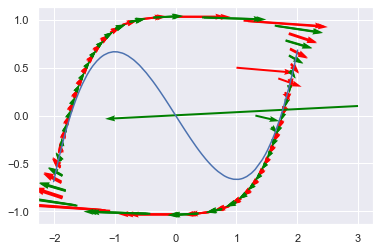

In [16]:
sns.lineplot(Res1[0], Res1[0]**3/3-Res1[0])
u,v=fonc([Res4[0], Res4[1]])
plt.quiver(Res4[0], Res4[1], u,v,color='red')
u,v=fonc([Res5[0], Res5[1]])
plt.quiver(Res5[0], Res5[1], u,v,color='green')